In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


processing fold # 0 epochs = 100
processing fold # 1 epochs = 100
processing fold # 2 epochs = 100
processing fold # 3 epochs = 100


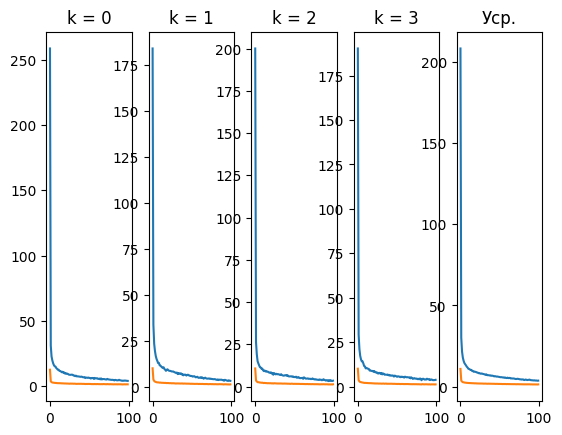

Уср. mae -  2.4072028398513794
Уср. mse -  11.63533616065979
processing fold # 0 epochs = 50
processing fold # 1 epochs = 50
processing fold # 2 epochs = 50
processing fold # 3 epochs = 50


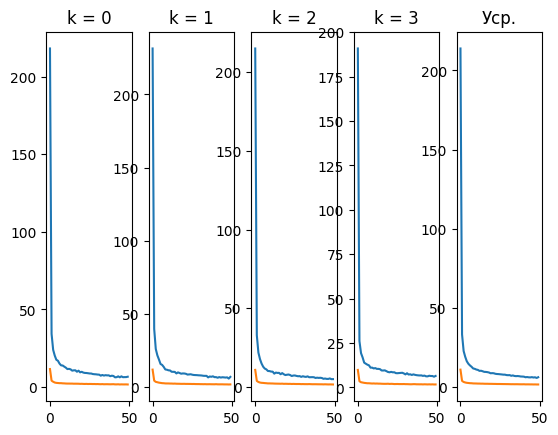

Уср. mae -  2.3223528265953064
Уср. mse -  10.729235410690308
processing fold # 0 epochs = 200
processing fold # 1 epochs = 200
processing fold # 2 epochs = 200
processing fold # 3 epochs = 200


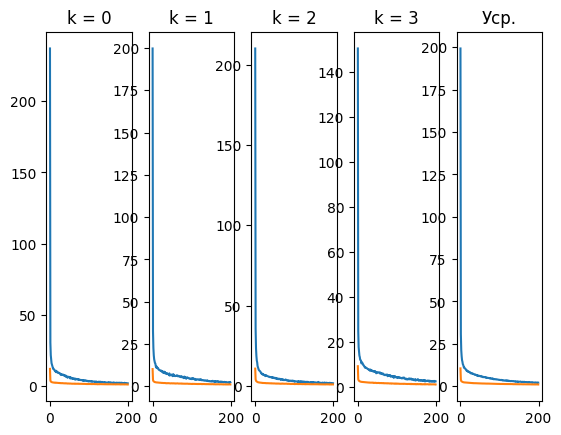

Уср. mae -  2.4837910532951355
Уср. mse -  13.207856178283691
processing fold # 0 epochs = 100
processing fold # 1 epochs = 100


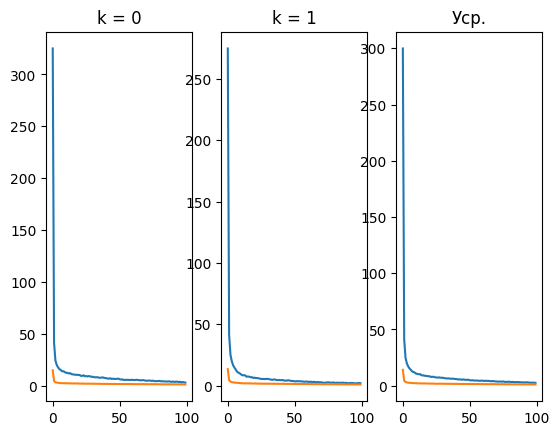

Уср. mae -  2.7898988723754883
Уср. mse -  17.882824897766113
processing fold # 0 epochs = 100
processing fold # 1 epochs = 100
processing fold # 2 epochs = 100
processing fold # 3 epochs = 100
processing fold # 4 epochs = 100
processing fold # 5 epochs = 100
processing fold # 6 epochs = 100
processing fold # 7 epochs = 100


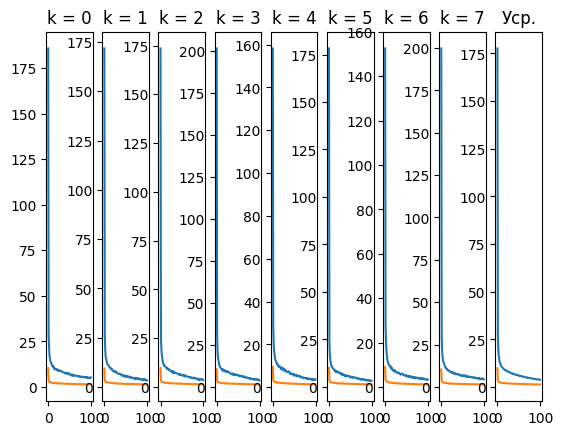

Уср. mae -  2.3743977397680283
Уср. mse -  13.26058942079544


In [6]:
#Подключение модулей
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Masking, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import LabelEncoder
#Загрузка набора данных, присутствующих в составе Keras
def preprocess():
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
    test_data = (test_data - train_data.mean(axis=0)) / train_data.std(axis=0)
    return train_data, train_targets
#Определим функцию build_model()
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(preprocess()[0].shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
#Перекрестная проверка по K блокам
def cross_validation(K, epochs):
    num_val_samples = len(preprocess()[0]) // K
    all_mae = []
    all_mse = []
    histories = []
    for i in range(K):
        print('processing fold # ' + str(i) + ' epochs = ' + str(epochs))
        val_data = preprocess()[0][i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = preprocess()[1][i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate([preprocess()[0][:i * num_val_samples], preprocess()[0][(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate([preprocess()[1][:i * num_val_samples], preprocess()[1][(i + 1) * num_val_samples:]], axis=0)
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets, epochs=epochs, batch_size=1, verbose=0)
        histories.append(history)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_mae.append(val_mae)
        all_mse.append(val_mse)
    #Производим инициализацию переменных, для получения средних значений потери и точности обучающих данных
    mean_loss = 0
    mean_accuracy = 0
    for i in range(K):
        mean_loss += np.array(histories[i].history['loss'])
        mean_accuracy += np.array(histories[i].history['mae'])  
    #Построение графиков
    fig, axs = plt.subplots(1,K+1)
    for i in range(K):
        axs[i].plot(histories[i].history['loss'], label='mse')
        axs[i].plot(histories[i].history['mae'], label='mae')
        axs[i].set_title('k = ' + str(i))
    axs[K].plot(mean_loss / K, label='mse')
    axs[K].plot(mean_accuracy / K, label='mae')
    axs[K].set_title('Уср.')
    plt.show()
    #Вывод усреднённых значений mae (средняя квадратичная ошибка) и mse (средняя абсолютная ошибка)    
    print('Уср. mae - ', np.mean(all_mae))
    print('Уср. mse - ', np.mean(all_mse))
#Обращаемся к перекрёстной проверки, задаём значения коэффициента k и количество эпох
cross_validation(4, 100)
cross_validation(4, 50)
cross_validation(4, 200)
cross_validation(2, 100)
cross_validation(8, 100)
